# **Azure api, Computer Vision**

Method used here is out of version, not vaild now

## *image analyize*

In [15]:
import requests #for network communication
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO #packages for img handling
import json #packages for json data handling

In [37]:
# Key and endpoint for api use
subscription_key = 'key value'
vision_base_url = 'endpoint' + '/vision/v2.0/' #can get at Azure portal

analyze_url = vision_base_url + 'analyze'



In [38]:
# Prepare image
img_url = 'https://t1.daumcdn.net/thumb/R720x0.fjpg/?fname=http://t1.daumcdn.net/brunch/service/user/9J8F/image/1e3wUsg9qYcvc75aGAZu6OM3lfE.jpg'

con = requests.get(img_url).content
byte = BytesIO(con)
image = Image.open(byte)

# image = Image.open(BytesIO(requests.get(img_url).content))

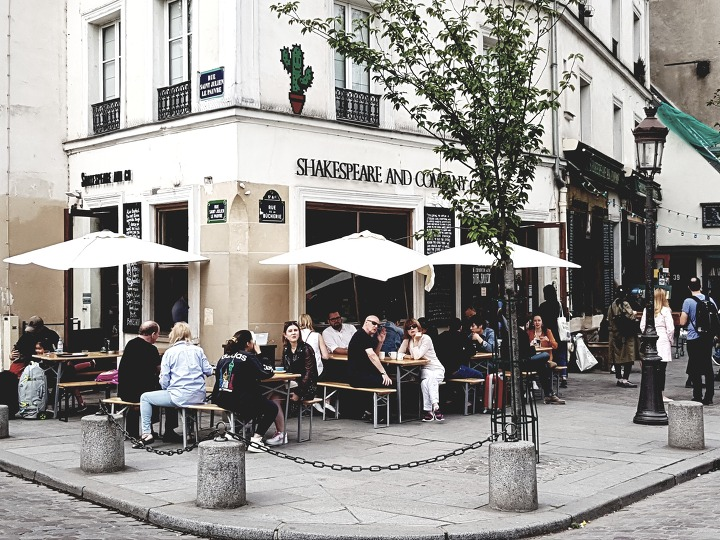

In [39]:
image

In [40]:
# Set headers
headers = {'Ocp-Apim-Subscription-key':subscription_key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':img_url}

In [41]:
# Get analyze data use api
response = requests.post(analyze_url, headers=headers, params=params, json=data)
result = response.json()

print(result)

{'categories': [{'name': 'building_', 'score': 0.1953125, 'detail': {'landmarks': []}}, {'name': 'building_corner', 'score': 0.3046875, 'detail': {'landmarks': []}}, {'name': 'outdoor_', 'score': 0.00390625, 'detail': {'landmarks': []}}, {'name': 'outdoor_street', 'score': 0.234375, 'detail': {'landmarks': []}}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'White', 'dominantColors': ['White', 'Grey', 'Black'], 'accentColor': '44716C', 'isBwImg': False, 'isBWImg': False}, 'description': {'tags': ['building', 'outdoor', 'person', 'street', 'sidewalk', 'city', 'man', 'people', 'walking', 'sitting', 'large', 'table', 'group', 'standing', 'snow', 'young', 'hydrant', 'woman', 'holding', 'riding', 'tall', 'jumping', 'bench', 'crowd', 'trick', 'doing', 'parked', 'air'], 'captions': [{'text': 'a group of people walking on a city street', 'confidence': 0.9523903773182516}]}, 'requestId': '97af0107-c924-473b-8b09-9d0aa804c3e8', 'metadata': {'height': 540, 'width': 720

In [42]:
# Print image description
image_caption = result['description']['captions'][0]['text'] #read JSON and get value needed

print(image_caption)

a group of people walking on a city street


## *Object detection*

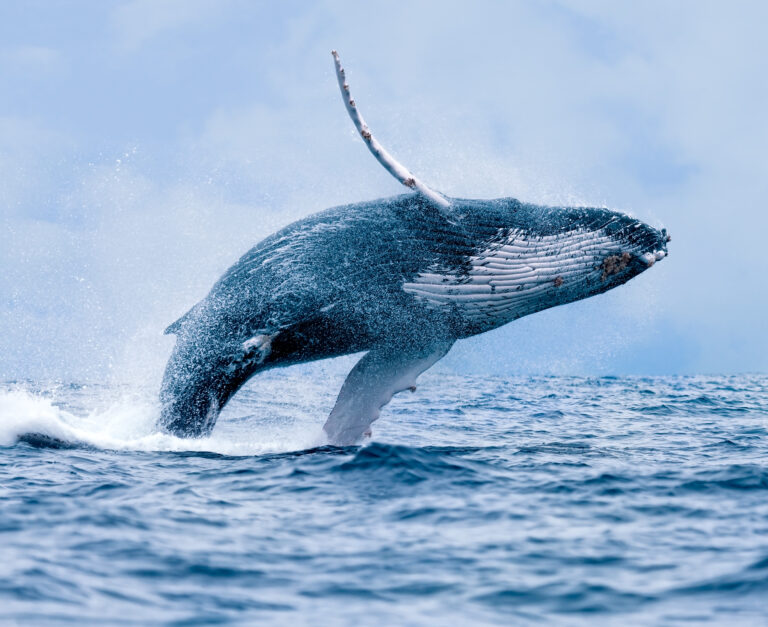

In [43]:
# Prepare image
detect_url = vision_base_url + 'detect' #api endpoint address

img_url = 'https://www.sciencetimes.co.kr/wp-content/uploads/2022/09/%E1%84%80%E1%85%B3%E1%84%85%E1%85%B5%E1%86%B71_Getty-Images-768x627.jpg'
image = Image.open(BytesIO(requests.get(img_url).content))

image

In [44]:
# Set headers
headers = {'Ocp-Apim-Subscription-key':subscription_key}
params = {'visualFeatures':'Categories,Description,Color'}
data = {'url':img_url}

In [45]:
# Get detected data use api
response = requests.post(detect_url, headers = headers, params = params, json = data)
result = response.json()
result

{'objects': [{'rectangle': {'x': 152, 'y': 60, 'w': 526, 'h': 398},
   'object': 'whale',
   'confidence': 0.535,
   'parent': {'object': 'marine mammal',
    'confidence': 0.637,
    'parent': {'object': 'mammal',
     'confidence': 0.642,
     'parent': {'object': 'animal', 'confidence': 0.927}}}}],
 'requestId': '37614f8a-57c1-469f-8dec-c9fe6dd983a1',
 'metadata': {'height': 627, 'width': 768, 'format': 'Jpeg'}}

In [46]:
# Drawing box

from PIL import Image, ImageDraw, ImageFont #import package for drawing

draw = ImageDraw.Draw(image) #open image for draw

In [47]:
# Function draw box

def MakeRect(detectData):
  objects = detectData['objects']

  for obj in objects:
    # print(obj)

    rect = obj['rectangle']
    # print(rect)

    x = rect['x'] 
    y = rect['y']
    w = rect['w']
    h = rect['h']

    draw.rectangle(((x,y),(x+w,y+h)),outline='red') #set left-top and right-bottom

    nameTag = obj['object']
    draw.text((x,y),nameTag,fill='red') #read JSON and get values needed

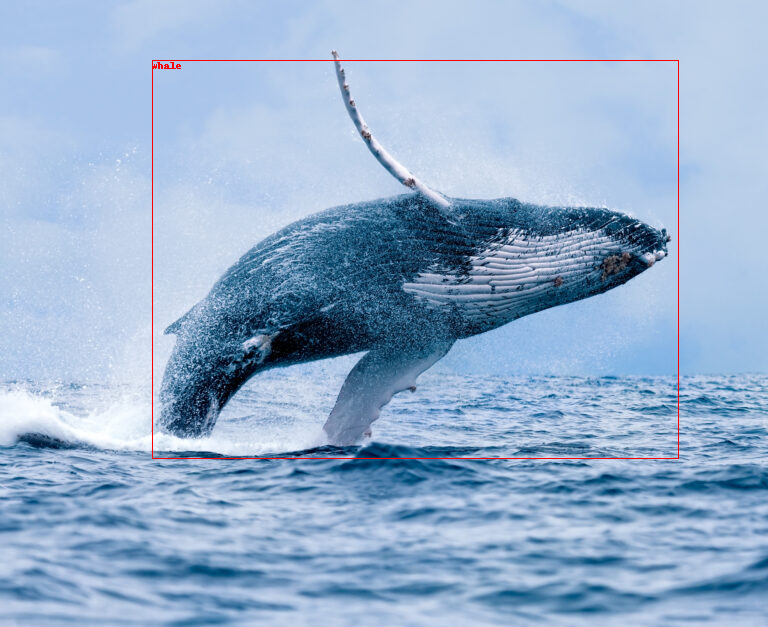

In [48]:
MakeRect(result)

image